<a href="https://colab.research.google.com/github/viviannemedeiros/seriesTemporais/blob/master/ProjetoSeriesTemporais_VivianneMedeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Final - Séries Temporais** 

**Prof:** Paulo Salgado

**Discente:** Vivianne Medeiros


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE

from sklearn.neighbors import KNeighborsRegressor

In [26]:
dadosSunspot = pd.read_csv('https://raw.githubusercontent.com/EraylsonGaldino/dataset_time_series/master/sunspot.txt', header=None, names=['Indice'])

In [27]:
dadosSunspot.head()

,Indice
0,5.0
1,11.0
2,16.0
3,23.0
4,36.0


In [28]:
dadosSunspot.describe()

,Indice
count,314.000000
mean,46.577389
std,38.841213
min,0.000000
25%,14.625000
50%,37.550000
75%,66.600000
max,190.200000


In [29]:
dates = sm.tsa.datetools.dates_from_range('1700', length=len(dadosSunspot))
dadosSunspot.index = dates
dadosSunspot

,Indice
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2009-12-31,36.0
2010-12-31,23.0
2011-12-31,16.0
2012-12-31,11.0


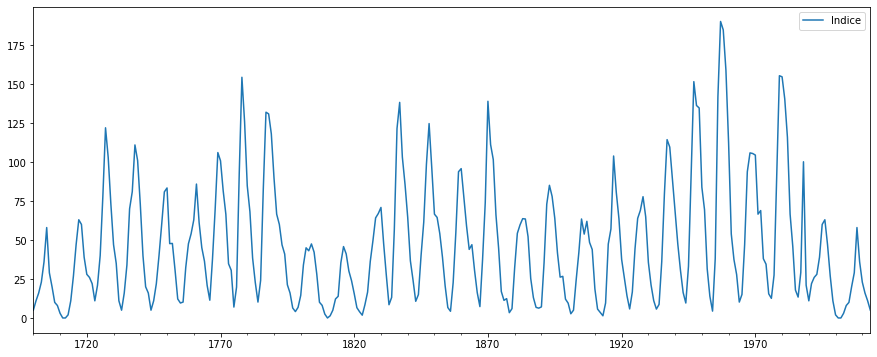

In [30]:
dadosSunspot.plot();

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(dadosSunspot)

In [32]:
serie_normalizada = scaler.transform(dadosSunspot.Indice.values.reshape(1, -1))

In [33]:
dadosSunspot['Normalizado'] = serie_normalizada[0]

In [34]:
dadosSunspot.describe()

,Indice,Normalizado
count,314.000000,314.000000
mean,46.577389,0.244886
std,38.841213,0.204212
min,0.000000,0.000000
25%,14.625000,0.076893
50%,37.550000,0.197424
75%,66.600000,0.350158
max,190.200000,1.000000


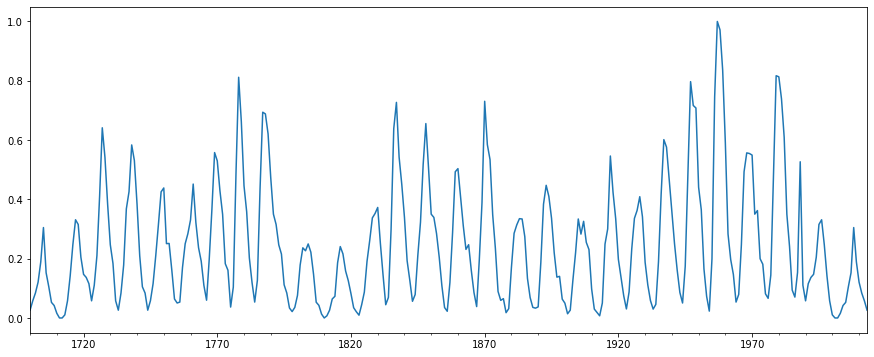

In [35]:
dadosSunspot['Normalizado'].plot();

In [36]:
#treinamento (75%) e teste (25%)
train_data_sunspot, test_data_sunspot = dadosSunspot['Normalizado'].loc['1700':'1935'], dadosSunspot['Normalizado'].loc['1936':]

In [37]:
train_data_sunspot

1700-12-31    0.026288
1701-12-31    0.057834
1702-12-31    0.084122
1703-12-31    0.120925
1704-12-31    0.189274
                ...   
1931-12-31    0.111462
1932-12-31    0.058360
1933-12-31    0.029968
1934-12-31    0.045741
1935-12-31    0.189800
Name: Normalizado, Length: 236, dtype: float64

In [38]:
test_data_sunspot

1936-12-31    0.419033
1937-12-31    0.601472
1938-12-31    0.576236
1939-12-31    0.466877
1940-12-31    0.356467
                ...   
2009-12-31    0.189274
2010-12-31    0.120925
2011-12-31    0.084122
2012-12-31    0.057834
2013-12-31    0.026288
Name: Normalizado, Length: 78, dtype: float64

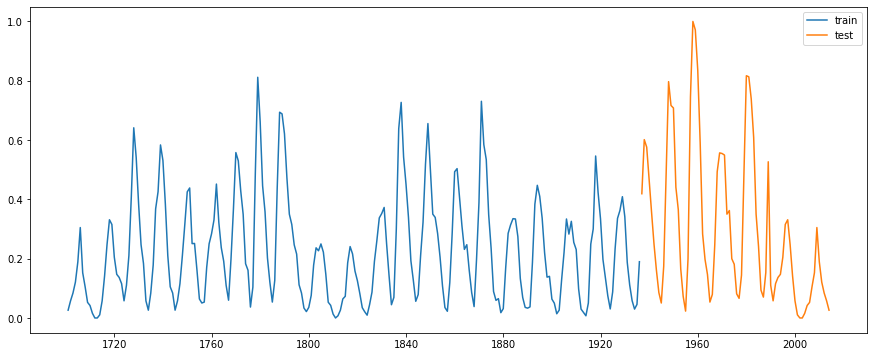

In [39]:
plt.plot(train_data_sunspot, label='train')
plt.plot(test_data_sunspot, label = 'test')
plt.legend(loc= 'best')
plt.show()

Identificação 

In [40]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

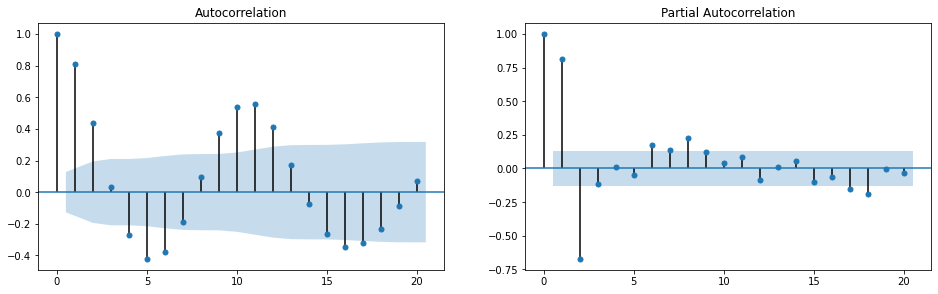

In [41]:
qtd_lag = 20
acf_pacf(train_data_sunspot, qtd_lag)

In [42]:
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC') 
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (1%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        
        print('--------estacionária')
    else:
        print(df_output[0])
        print('--------não estacionária')

In [43]:
teste_df(train_data_sunspot)

Test Statistic          -3.162065
p-value                  0.022288
#Lags                    8.000000
Nº Observações         227.000000
Valor Crítico (1%)      -3.459490
Valor Crítico (5%)      -2.874358
Valor Crítico (10%)     -2.573602
dtype: float64
-3.1620646684608302
--------não estacionária


#### **Modelo ARIMA**

In [44]:
#parâmetros
p,d,q = 1, 1, 0

In [45]:
model_sunspot = ARIMA(train_data_sunspot, order=(p,d,q)).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


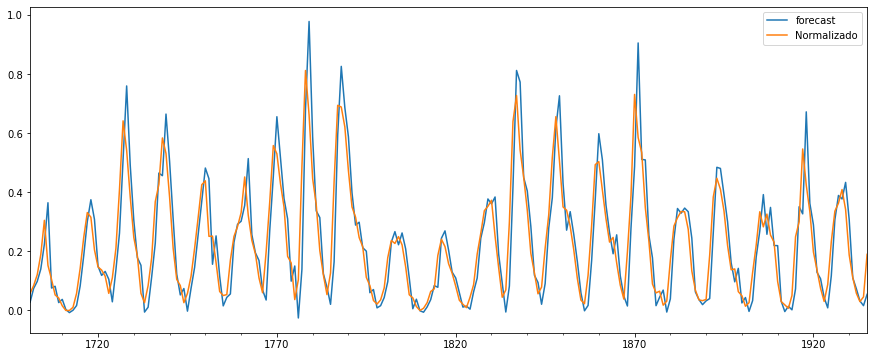

In [55]:
model_sunspot.plot_predict();

##### **Avaliação**

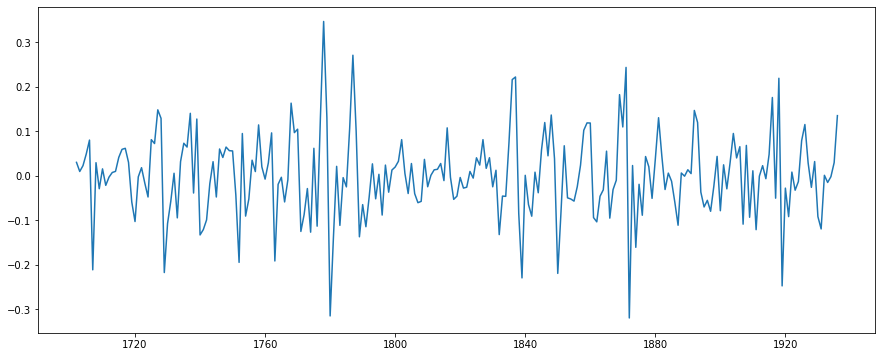

In [57]:
train_predict_sunspot = model_sunspot.predict(typ='levels')
residuo_sunspot = train_data_sunspot.values[1:] - train_predict_sunspot
plt.plot(residuo_sunspot);

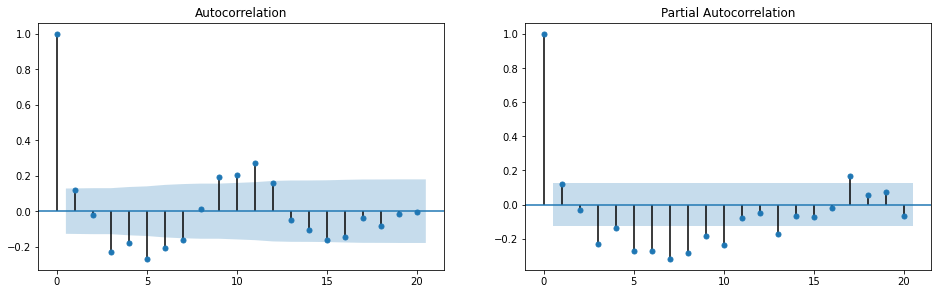

In [58]:
acf_pacf(residuo_sunspot, 20)

In [59]:
def MAPE(actual: np.ndarray, predicted: np.ndarray):

    actual = list(actual)
    predicted = list(predicted)
    n = len(actual)
    soma = 0
    for i in range(0, len(actual)):
        if actual[i] > 0.0:
            x = np.abs((predicted[i] - actual[i]) / actual[i])

        else:
            x = 0
        
        soma = x + soma
    return 100/n * soma

In [67]:
MAPE(train_data_sunspot.values[1:],train_predict_sunspot)

45.010172507855934

**Avaliação dos Parâmetros** 

As combinações de parâmetros **(p, d, q)** abaixo foram utilizadas e obteve-se os seguintes valores para a métrica **MAPE**: 
* p,d,q = 1, 1, 0 => 45.01
* p,d,q = 1, 1, 1 => 46.62
* p,d,q = 2, 1, 0 => 48.64
* p,d,q = 2, 1, 2 => 58.25

Dessa forma, considerando-se o critério de utilizar o modelo mais parcimonioso, elegeu-se os parâmetros (1, 1, 0), o qual apresentou melhor valor para métrica MAPE mas que ainda assim tratou-se de um número alto. Ressalta-se que o resíduo resultante não caracterizou-se como ruído branco, o que aponta que este modelo ARIMA não mostrou-se adequado para os dados sob análise. Outra característica observada nos dados foi a sazonalidade, de forma que utilizaremos em seguida o modelo SARIMA para comparar os resultados e verificar se seria uma melhor opção para o caso em questão. 


##### **Teste**

In [68]:
predict_test_sunspot = model_sunspot.forecast(len(test_data_sunspot))[0]

In [71]:
len(test_data_sunspot.values)

78

In [72]:
len(predict_test_sunspot)

78

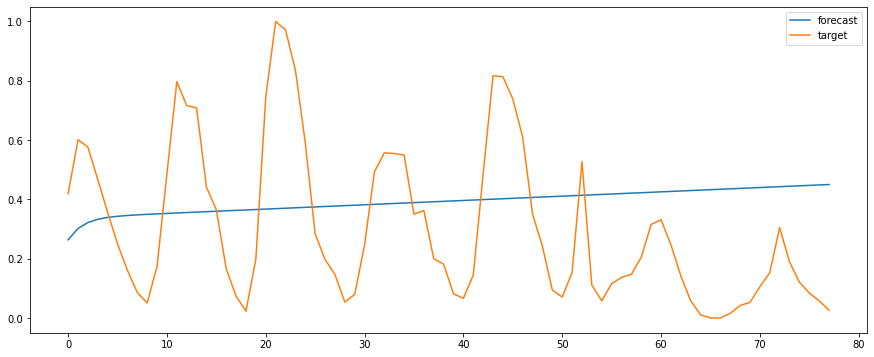

In [73]:
plt.plot(predict_test_sunspot, label = 'forecast')
plt.plot(test_data_sunspot.values, label = 'target')
plt.legend()
plt.show()

In [76]:
MAPE(test_data_sunspot.values,predict_test_sunspot)

288.7435425315242

**Análise dos Dados de Testes: ARIMA**

Conforme esboçado na seção anterior, confirmou-se a ideia de que o modelo ARIMA não apresentaria bons resultados para o caso sob análise, de forma que sua aplicação nos dados de testes apresentou um **MAPE** de 288.74 e uma curva bem distinta do esperado. 

Nas seções seguintes, continuaremos a análise com outros modelos para tentar identificar um mais adequado nesta situação.

#### **Modelo SARIMA**

In [77]:
#parâmetros
p,d,q = 1, 1, 0 # parâmetros do ARIMA
P,D,Q = 1,1,0   # parâmetros aplicados a sazonalidade
m = 10       # intervalo do tempo entre as sazonalidade: 10 anos


In [78]:
model_sarima = SARIMAX(endog=train_data_sunspot.values,order=(p,d,q),seasonal_order=(P,D,Q,m)).fit()

In [80]:
len(model_sarima.predict(typ='levels'))

236

In [81]:
len(train_data_sunspot)

236

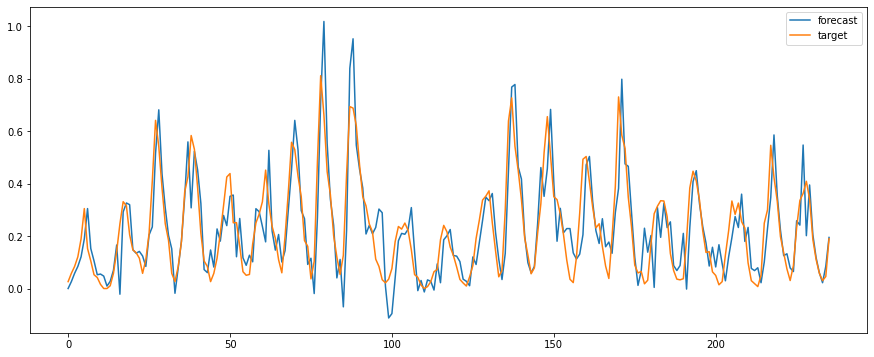

In [83]:
plt.plot(model_sarima.predict(typ='levels'), label = 'forecast')
plt.plot(train_data_sunspot.values, label = 'target')
plt.legend()
plt.show()

##### **Avaliação**

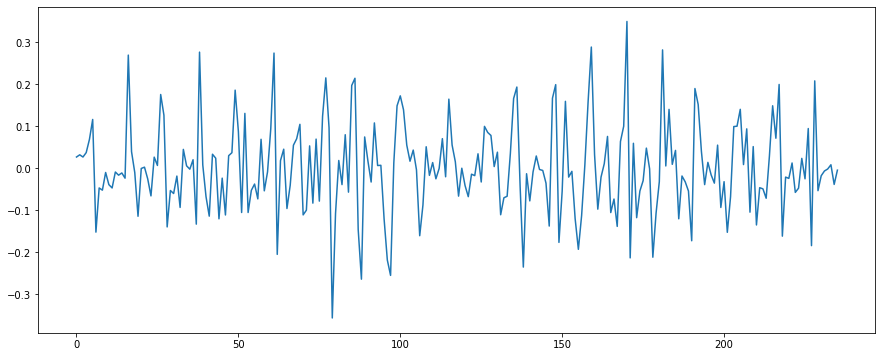

In [84]:
train_predict_sarima = model_sarima.predict(typ='levels')
residuo_sarima = train_data_sunspot.values - train_predict_sarima
plt.plot(residuo_sarima);


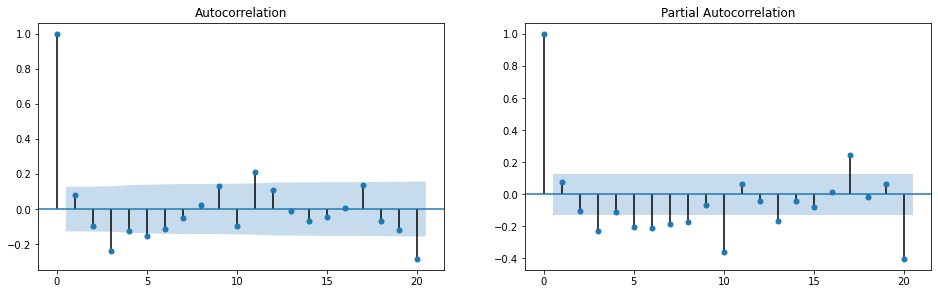

In [85]:
acf_pacf(residuo_sarima, 20)

In [86]:
MAPE(train_data_sunspot.values,train_predict_sarima)

78.34822400303649

##### **Teste**

In [87]:
predict_test_sarima = model_sarima.forecast(len(test_data_sunspot))

In [89]:
len(predict_test_sarima)

78

In [90]:
len(test_data_sunspot.values)

78

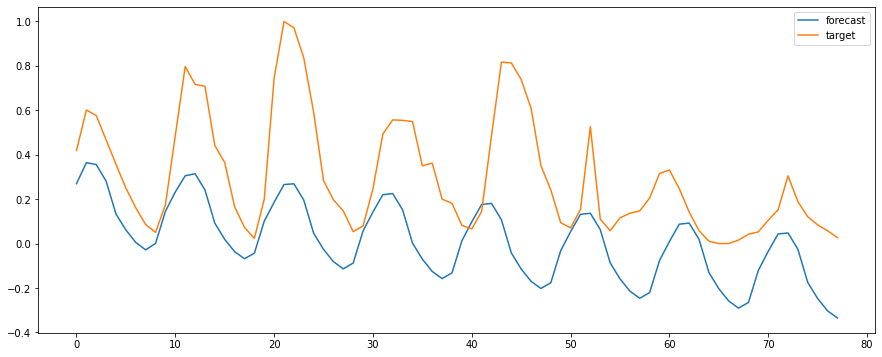

In [91]:
plt.plot(predict_test_sarima, label = 'forecast')
plt.plot(test_data_sunspot.values, label = 'target')
plt.legend()
plt.show()

In [94]:
MAPE(test_data_sunspot.values, predict_test_sarima)

179.61453277398283

**Análise dos Dados de Testes: SARIMA**

Conforme esperado, o SARIMA apresentou melhor medida MAPE na base de Testes, tendo obtido 179.61 para os parâmetros utilizados, ao passo que o ARIMA teve um **MAPE** de 288.74. A curva dos dados de testes também mostrou-se melhor que a do ARIMA, exibindo a característica da sazonalidade.

Continuaremos utilizando outras abordagens para tentar chegar em melhores resultados.


#### **Modelo MLP**

In [95]:
def create_sliding_windows(series, window_size):
   
    list_of_sliding_windows = []
    list_size_to_iterate = len(series) - window_size 
    for i in range(0, list_size_to_iterate):
        window = series[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows).reshape(len(list_of_sliding_windows), window_size+1)

In [96]:
def select_lag_acf(serie, max_lag):
    from statsmodels.tsa.stattools import acf
    x = serie[0: max_lag+1]
    
    acf_x, confint = acf(serie, nlags=max_lag, alpha=.05, fft=False,
                             unbiased=False)
    
    
    limiar_superior = confint[:, 1] - acf_x
    limiar_inferior = confint[:, 0] - acf_x

    lags_selecionados = []
    
    for i in range(1, max_lag+1):

        
        if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
            lags_selecionados.append(i-1)  #-1 por conta que o lag 1 em python é o 0
    
    #caso nenhum lag seja selecionado, essa atividade de seleção para o gridsearch encontrar a melhor combinação de lags
    if len(lags_selecionados)==0:


        print('NENHUM LAG POR ACF')
        lags_selecionados = [i for i in range(max_lag)]

    print('LAGS', lags_selecionados)

    #inverte o valor dos lags para usar na lista de dados
    lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]



    return lags_selecionados

In [97]:
lags_sel = select_lag_acf(train_data_sunspot, 20)

LAGS [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16]


In [98]:
windows_train = create_sliding_windows(train_data_sunspot.values, 20)

In [99]:
windows_train.shape

(216, 21)

In [100]:
tam_val = len(test_data_sunspot)
tam_val

78

In [101]:
X_train, y_train = windows_train[0:-tam_val, 0:-1], windows_train[0:-tam_val, -1]
X_val, y_val = windows_train[-tam_val:, 0:-1], windows_train[-tam_val:, -1]

In [102]:
X_train.shape

(138, 20)

In [103]:
pontos_anteriores_test = train_data_sunspot.values[-20:]
test = np.hstack([pontos_anteriores_test, test_data_sunspot.values])

In [104]:
windows_test = create_sliding_windows(test, 20)

In [105]:
X_test, y_test = windows_test[:, 0:-1], windows_test[:, -1]
X_test.shape

(78, 20)

In [106]:
X_train[0, lags_sel]

array([0.20504732, 0.31545741, 0.24710831, 0.14195584, 0.05783386,
       0.        , 0.01577287, 0.04206099, 0.05257624, 0.18927445,
       0.12092534])

In [107]:
X_train = X_train[:,lags_sel ]
X_val = X_val[:, lags_sel]
X_test = X_test[:, lags_sel]

In [108]:
X_train.shape

(138, 11)

In [109]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):
    neuronios = [5, 10, 20, 25, 30, 40, 50]#, 60, 70, 80, 90, 100, 120, 150, 170, 200]
    func_activation = ['tanh','logistic', 'relu'] 
    alg_treinamento = ['lbfgs', 'sgd', 'adam']
    max_iteracoes = [10000]
    learning_rate = ['adaptive', 'invscaling']
        
    hyper_param = list(itertools.product(neuronios,func_activation,alg_treinamento,max_iteracoes, learning_rate))

    best_result = np.Inf
    for i, j, l, m, n in hyper_param:  

        for e in range(0,num_exec):
          
            mlp = MLPRegressor(hidden_layer_sizes=i, activation=j, solver=l, max_iter = m, learning_rate= n)
            mlp.fit(x_train, y_train)
            predict_validation = mlp.predict(x_val)

            mse = MSE(y_val, predict_validation)

            if mse < best_result:
                best_result = mse
                select_model = mlp
    
    
    return select_model

In [110]:
modelo =  treinar_mlp(X_train, y_train, X_val, y_val, 30)

In [111]:
modelo

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=40, learning_rate='invscaling',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

##### **Avaliação**

In [112]:
trainPredict = modelo.predict(X_train)

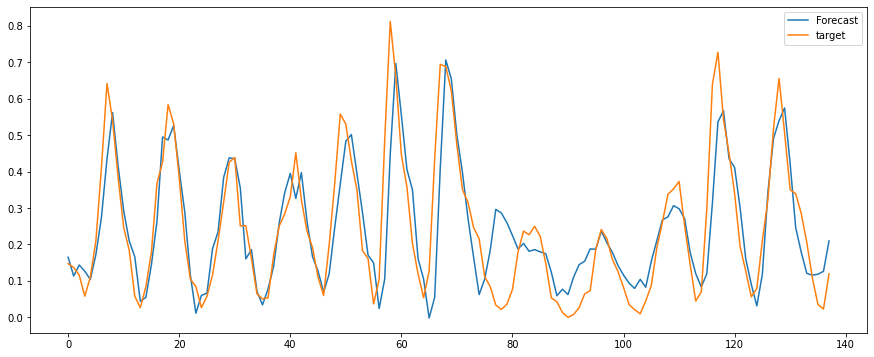

In [113]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [114]:
MAPE(y_train, trainPredict) 

86.34459317230777

In [115]:
predictRealInterval = scaler.inverse_transform(trainPredict.reshape(1, -1))
targetRealInterval =  scaler.inverse_transform(y_train.reshape(1, -1) )

In [116]:
MAPE(targetRealInterval[0], predictRealInterval[0]) # medida MAPE não é influenciada pela normalização

86.34459317230778

In [118]:
MSE(targetRealInterval,predictRealInterval)

393.2758422919247

##### **Teste**

In [119]:
testPredict = modelo.predict(X_test)

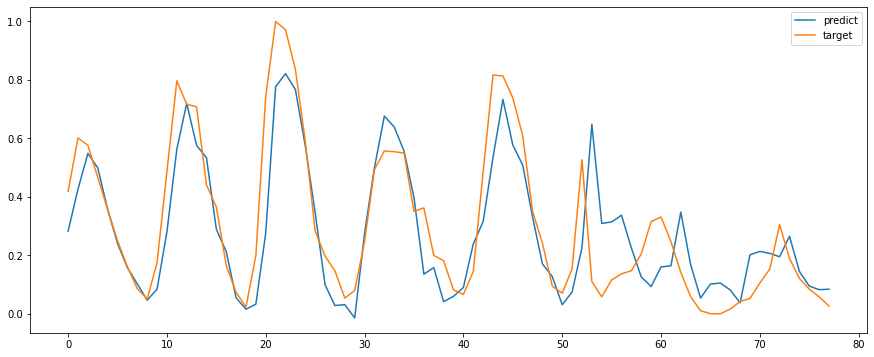

In [120]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [124]:
MAPE(y_test, testPredict)

64.63820743585269

In [125]:
predictRealInterval = scaler.inverse_transform(testPredict.reshape(1, -1))
targetRealInterval =  scaler.inverse_transform(y_test.reshape(1, -1) )

In [126]:
MSE(targetRealInterval,predictRealInterval)

735.8615932241505

**Análise dos Dados de Testes: MLP**

Efetuou-se uma análise de sensibilidade dos parâmetros do algoritmo MLP utilizando-se um conjunto de validação e com 30 execuções. O melhor modelo baseado na métrica MSE tinha os seguintes parâmetros:

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=40, learning_rate='invscaling',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False) 

Como última etapa, vamos utilizar o modelo KNN para comparar os resultados.


#### **Modelo KNN**

In [138]:
def treinar_knn(x_train, y_train, x_val, y_val):
    
    k = [2, 3, 5, 7, 11]
    metric = ['euclidean', 'minkowski']
    
    hyper_param = list(itertools.product(k,metric))

    best_result = np.Inf
    for i, j  in hyper_param:

      knn = KNeighborsRegressor(n_neighbors=i,  metric=j)
      knn.fit(x_train, y_train)
      predict_validation = knn.predict(x_val)
      mse = MSE(y_val, predict_validation)

      if mse < best_result:
          best_result = mse
          select_model = knn
                                
    return select_model

In [139]:
modelo =  treinar_knn(X_train, y_train, X_val, y_val)

In [140]:
modelo

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

##### **Avaliação**

In [141]:
trainPredict = modelo.predict(X_train)

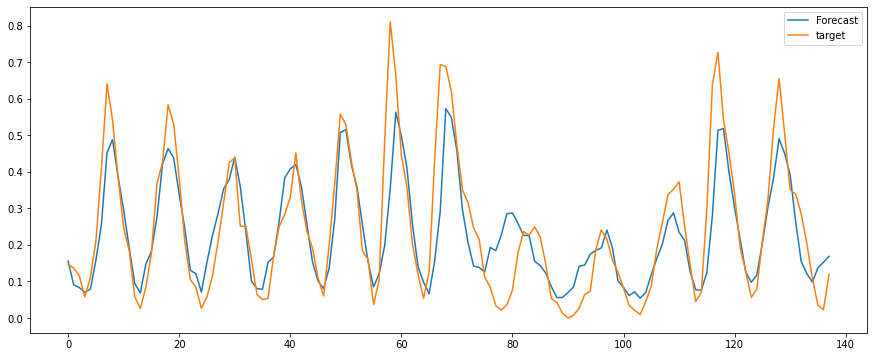

In [142]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [143]:
MAPE(y_train,trainPredict)

72.59925259126159

In [144]:
predictRealInterval = scaler.inverse_transform(trainPredict.reshape(1, -1))
targetRealInterval =  scaler.inverse_transform(y_train.reshape(1, -1) )

In [145]:
MSE(targetRealInterval,predictRealInterval)

378.93817822493713

##### **Teste**

In [146]:
testPredict = modelo.predict(X_test)

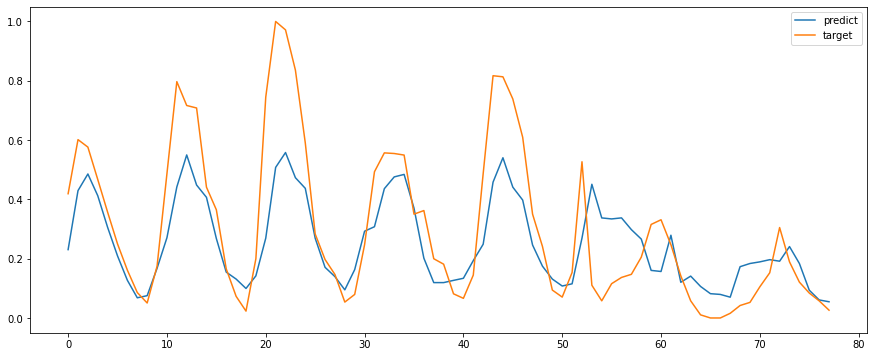

In [147]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [148]:
MAPE(y_test,testPredict)

74.75017384233905

In [149]:
predictRealInterval = scaler.inverse_transform(testPredict.reshape(1, -1))
targetRealInterval =  scaler.inverse_transform(y_test.reshape(1, -1) )

In [150]:
MSE(targetRealInterval,predictRealInterval)

1032.0173585505404

**Análise dos Dados de Testes: KNN**

Efetuou-se uma análise de sensibilidade dos parâmetros do algoritmo KNN utilizando-se um conjunto de validação. O melhor modelo baseado na métrica MSE tinha os seguintes parâmetros:

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

#### **Considerações Finais**

De forma resumida, temos as seguintes métricas com relação aos diferentes modelos utilizados para a mesma base de dados normalizada:
* **Algoritmo / MAPE Testes / MSE Testes**
* **ARIMA** / 288.74
* **SARIMA** / 179.61
* **MLP** / 64.63 / 735.86
* **KNN:** / 74.75 / 1032.01

Dessa forma, observa-se que o modelo com melhores medidas para os dados em questão foi o **MLP**. A curva que compara a previsão x série real deste modelo também apresentou-se mais próxima que as demais, indicando que este seria o mais adequado para a base avaliada dentre os algoritmos considerados.  